# Smoking and Drinking Alcohol 


In [50]:
%matplotlib inline

In [51]:
# Dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("Resources/heart_2020_cleaned.csv")
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [52]:
heart_disease_count = data['HeartDisease'].value_counts()
 
 
print("Number of individuals with heart disease:", heart_disease_count)

Number of individuals with heart disease: HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64


In [53]:
cleaned_data= data[data['HeartDisease'] == 'Yes']
cleaned_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes
42,Yes,25.06,No,No,No,0.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,7.0,No,No,Yes
43,Yes,30.23,Yes,No,No,6.0,2.0,Yes,Female,75-79,White,Yes,Yes,Fair,8.0,No,Yes,No


In [54]:
# Does smoking and drinking play a factor 

In [55]:
data.dtypes.unique()

array([dtype('O'), dtype('float64')], dtype=object)

In [56]:
Heart_Disease_df = data[['HeartDisease', 'Smoking', 'AlcoholDrinking']].copy()
Heart_Disease_df.head()

,HeartDisease,Smoking,AlcoholDrinking
0,No,Yes,No
1,No,No,No
2,No,Yes,No
3,No,No,No
4,No,No,No


In [57]:
# Calculate the total number of smokers and non smokers
Smoking = pd.DataFrame(data['Smoking']).value_counts()
Smoking

Smoking
No         187887
Yes        131908
Name: count, dtype: int64

## Smoking vs Heart Disease

In [58]:
Smokers = data.groupby(['Smoking', 'HeartDisease']).size()
Smokers


Smoking  HeartDisease
No       No              176551
         Yes              11336
Yes      No              115871
         Yes              16037
dtype: int64

In [59]:
Smokers_df = pd.DataFrame(Smokers)
Smokers_df


0
Smoking HeartDisease        
No      No            176551
        Yes            11336
Yes     No            115871
        Yes            16037

In [60]:
# Create dictionary of Smokers
label_dict_smoking = {'No':{'No':'Doesnot smoke, Does not have Heart Disease',
                    'Yes':'Doesnot smoke, Have Heart Disease'},
              'Yes':{'No':'Smokes, Doesnot have Heart Disease',
                     'Yes':'Smokes, Have Heart Disease'}}
label_dict_smoking

{'No': {'No': 'Doesnot smoke, Does not have Heart Disease',
  'Yes': 'Doesnot smoke, Have Heart Disease'},
 'Yes': {'No': 'Smokes, Doesnot have Heart Disease',
  'Yes': 'Smokes, Have Heart Disease'}}

In [61]:
Smokers_df.reset_index(inplace=True)
Smokers_df

,Smoking,HeartDisease,0
0,No,No,176551
1,No,Yes,11336
2,Yes,No,115871
3,Yes,Yes,16037


In [62]:
Smokers_df['label'] = Smokers_df.apply(lambda x: label_dict_smoking[x['Smoking']][x['HeartDisease']], axis=1)
Smokers_df

,Smoking,HeartDisease,0,label
0,No,No,176551,"Doesnot smoke, Does not have Heart Disease"
1,No,Yes,11336,"Doesnot smoke, Have Heart Disease"
2,Yes,No,115871,"Smokes, Doesnot have Heart Disease"
3,Yes,Yes,16037,"Smokes, Have Heart Disease"


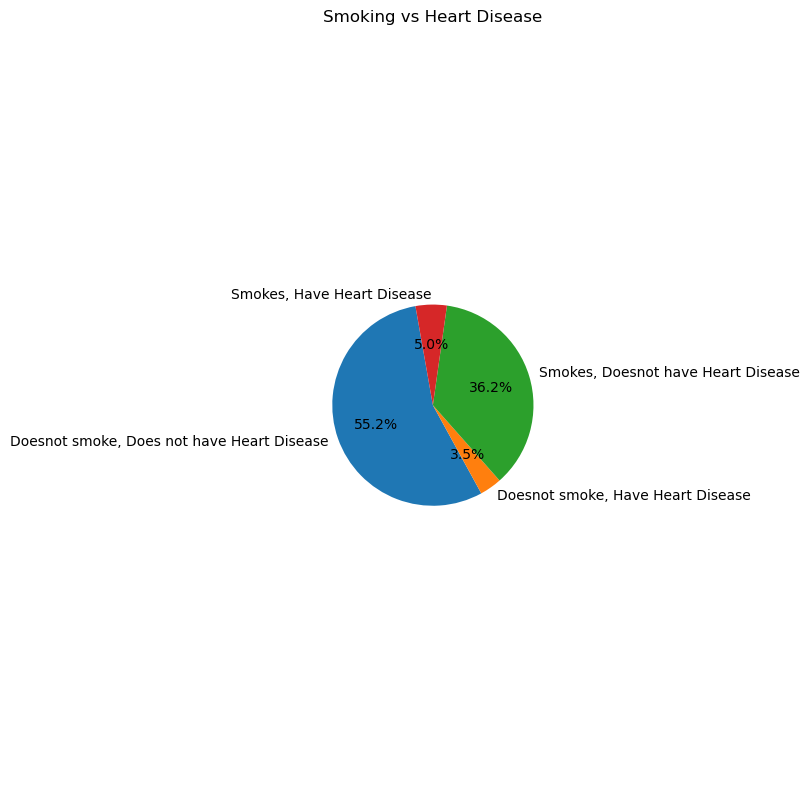

In [63]:
plt.figure(figsize=(8, 8))
plt.pie(Smokers, labels=Smokers_df['label'], autopct='%1.1f%%', startangle=100)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Smoking vs Heart Disease')
plt.tight_layout()
plt.savefig("output/Smoking_Vs._Heart_Disease_Suad.png", bbox_inches='tight')
plt.show()


##  AlcoholDrinking and Heart Disease

In [64]:
# Rename AlcoholDrinking to "Alcohol"
Heart_Disease_df = data.rename(columns={"AlcoholDrinking": "Alcohol"})
Heart_Disease_df.head()

,HeartDisease,BMI,Smoking,Alcohol,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [65]:
# Calculate the total of Alcohol consumers and non alcohol consumers
Alcohol = pd.DataFrame(Heart_Disease_df['Alcohol']).value_counts()
Alcohol

Alcohol
No         298018
Yes         21777
Name: count, dtype: int64

In [66]:
# Group Alcohol drinkers and heart disease 
Alcohol = Heart_Disease_df.groupby(['Alcohol', 'HeartDisease']).size()
Alcohol

Alcohol  HeartDisease
No       No              271786
         Yes              26232
Yes      No               20636
         Yes               1141
dtype: int64

In [67]:
# Create a dataframe for alcohol drinkers
Alcohol_df = pd.DataFrame(Alcohol)
Alcohol_df

0
Alcohol HeartDisease        
No      No            271786
        Yes            26232
Yes     No             20636
        Yes             1141

In [70]:
# Create a dictionary for Alcohol drinkers 
label_dict_Alcohol = {'No':{'No':'Doesnot consume Alcohol, Does not have Heart Disease',
                    'Yes':'Doesnot consume Alcohol, Have Heart Disease'},
              'Yes':{'No':'Consumes Alcohol, Doesnot have Heart Disease',
                     'Yes':'Consumes Alcohol, Have Heart Disease'}}
label_dict_Alcohol

{'No': {'No': 'Doesnot consume Alcohol, Does not have Heart Disease',
  'Yes': 'Doesnot consume Alcohol, Have Heart Disease'},
 'Yes': {'No': 'Consumes Alcohol, Doesnot have Heart Disease',
  'Yes': 'Consumes Alcohol, Have Heart Disease'}}

In [71]:
Alcohol_df.reset_index(inplace=True)
Alcohol_df

,Alcohol,HeartDisease,0
0,No,No,271786
1,No,Yes,26232
2,Yes,No,20636
3,Yes,Yes,1141


In [ ]:
column = Alcohol_df.columns
print(column)

In [72]:
Alcohol_df.rename(columns={0: 'Counts'}, inplace=True)
Alcohol_df.columns

Index(['Alcohol', 'HeartDisease', 'Counts'], dtype='object')

In [73]:
Alcohol_df['label'] = Alcohol_df.apply(lambda x: label_dict_Alcohol[x['Alcohol']][x['HeartDisease']], axis=1)
Alcohol_df

,Alcohol,HeartDisease,Counts,label
0,No,No,271786,"Doesnot consume Alcohol, Does not have Heart D..."
1,No,Yes,26232,"Doesnot consume Alcohol, Have Heart Disease"
2,Yes,No,20636,"Consumes Alcohol, Doesnot have Heart Disease"
3,Yes,Yes,1141,"Consumes Alcohol, Have Heart Disease"


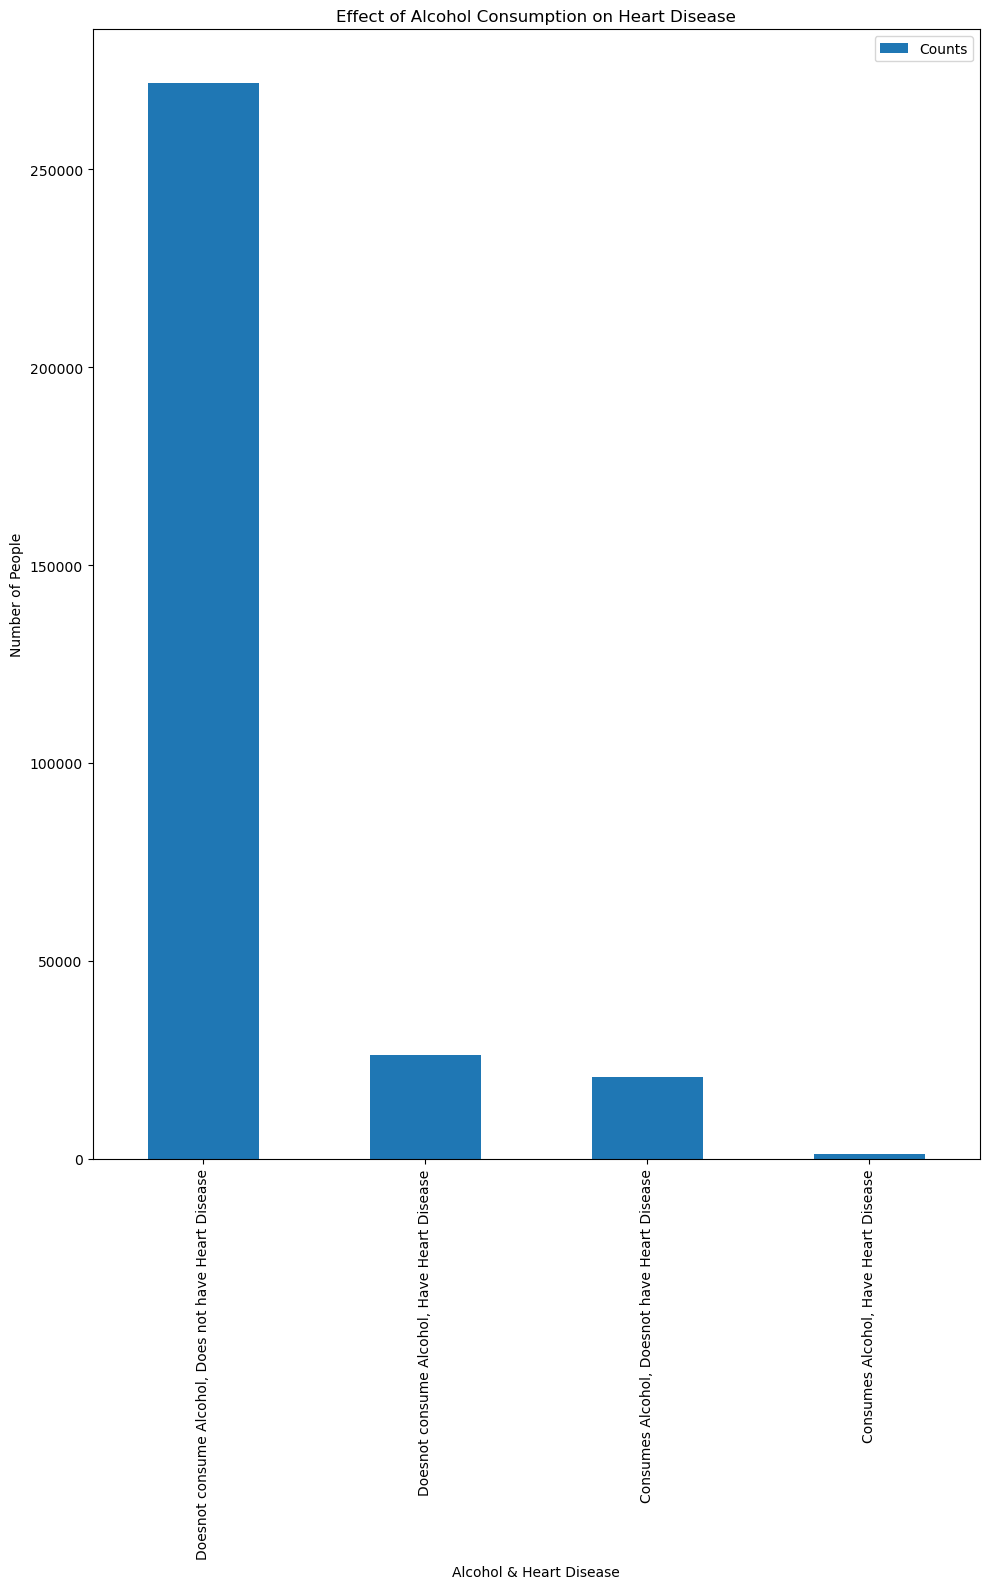

In [74]:
Alcohol_df.plot(x='label', 
                y='Counts', 
                kind='bar',
                figsize=(10,16),
                xlabel= "Alcohol & Heart Disease",
                ylabel= "Number of People",
                title='Effect of Alcohol Consumption on Heart Disease',
                
                )
plt.tight_layout()
plt.savefig("output/Alcohol_Vs._Heart_Disease_Suad.png", bbox_inches='tight')
plt.show()
